In [2]:
# # Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import shutil
import imageio
import os
import natsort
from natsort import natsorted
from datetime import datetime, date, time
import scipy.io
from scipy.io import loadmat
from decimal import Decimal
import ast

####################################################################################################

reactor = input("Reactor? ")

if reactor == "MSRE":
    fuel_type = input("LEU or HEU? ")
    if fuel_type == "LEU":
        heavy_metal = 0.013603741 #MTHM
    if fuel_type == "HEU":
        heavy_metal = 0.028277628
elif reactor == "MSBR":
    heavy_metal = 58.58689935
elif reactor == "MSDR":
    heavy_metal = 62.1 

plot_gas = input("Plot isotopes in the off-gas system?")
if plot_gas == "Y":
    plot_all_gas = input("Plot all isotopes? ")
    if plot_all_gas == "Y":
        print("Ok")
    else:
        isotopes_g = input("Provide list of isotopes to plot: ")
        isotopes_g = ast.literal_eval(isotopes_g)
        
plot_solid = input("Plot isotopes in the solid-trap system?")
if plot_solid == "Y":
    plot_all_solid = input("Plot all isotopes? ")
    if plot_all_solid == "Y":
        print("Ok")
    else:
        isotopes_s = input("Provide list of isotopes to plot: ")
        isotopes_s = ast.literal_eval(isotopes_s)
        
parametric = input("Parametric Case? ")

if parametric == "Y":
    #efficiencies = natsorted([0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.33, 0.65, 1.29, 2.57, 5.13])
    #efficiencies = natsorted([0.42, 0.44, 0.46, 0.48, 0.50, 0.52, 0.54, 0.56, 0.72, 1.04, 1.68, 2.96, 5.52, 10.64])
    efficiencies = natsorted([1.02, 1.04, 1.06, 1.08, 1.10, 1.12, 1.14, 1.16, 1.32, 1.64, 2.28, 3.56, 6.12])
    #efficiencies = natsorted([0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.36, 0.68, 1.32, 2.60, 5.16])
else:
    efficiencies = natsorted([1, 0.8, 0.6, 0.4, 0.2, 0.15, 0.12, 0.10, 0.05, 0.0])
    
eff = natsorted(list(((np.array(efficiencies) * 100).astype(int)).astype(str)))
print(natsorted(efficiencies))
print(natsorted(eff))


#####################################################################################################

plt_directory = "./Apollo/" + reactor 

print("Searching directory for .plt files...")
names = []
for root, dirs, files in os.walk(plt_directory):
    for file in files:
        if file.endswith(".plt"):
            #print(os.path.join(root, file))
            names.append(os.path.join(root, file))

if not names:
    print("List is empty")

names = natsorted(names)
names

##############################################################################################
##############################################################################################
################################## PLOTTING OPUS FILES #######################################
##############################################################################################
##############################################################################################
#["xe135", "kr86"]
# ["tc99", "tc99m", "mo99", "nb95", "ru103", "rh105"], "nd148"]


Reactor? MSBR
Plot isotopes in the off-gas system?N
Plot isotopes in the solid-trap system?N
Parametric Case? Y
[1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16, 1.32, 1.64, 2.28, 3.56, 6.12]
['102', '104', '106', '108', '110', '112', '113', '115', '132', '164', '227', '356', '612']
Searching directory for .plt files...


['./Apollo/MSBR\\MSBR_beta_102\\MSBR_beta_102.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_102\\MSBR_beta_102.000000000000000001.plt',
 './Apollo/MSBR\\MSBR_beta_102\\MSBR_beta_102.000000000000000002.plt',
 './Apollo/MSBR\\MSBR_beta_104\\MSBR_beta_104.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_104\\MSBR_beta_104.000000000000000001.plt',
 './Apollo/MSBR\\MSBR_beta_104\\MSBR_beta_104.000000000000000002.plt',
 './Apollo/MSBR\\MSBR_beta_106\\MSBR_beta_106.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_106\\MSBR_beta_106.000000000000000001.plt',
 './Apollo/MSBR\\MSBR_beta_106\\MSBR_beta_106.000000000000000002.plt',
 './Apollo/MSBR\\MSBR_beta_108\\MSBR_beta_108.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_108\\MSBR_beta_108.000000000000000001.plt',
 './Apollo/MSBR\\MSBR_beta_108\\MSBR_beta_108.000000000000000002.plt',
 './Apollo/MSBR\\MSBR_beta_110\\MSBR_beta_110.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_110\\MSBR_beta_110.000000000000000001.plt',
 './Ap

In [19]:
x = 0 #Index for names
y = 0 #Index for eff

for i in range(0, len(eff)):
#for i in range(1):
    print(eff[y])
   
    ############ Reads .plt files and creates a dataframe #############
    ############   values are multiplied by heavy_metal   #############
    print("Importing Data...")
    fuel_salt = pd.read_csv(names[x], sep="\s+", skiprows=5)
    fuel_salt = fuel_salt.T
    fuel_salt.reset_index(level=0, inplace=True)
    fuel_salt = fuel_salt.rename(columns = {'index':'time'})
#     fuel_salt.iloc[:,1:] = fuel_salt.iloc[:,1:].mul(heavy_metal)
    print("Finish importing fuel salt data...")

    off_gas = pd.read_csv(names[x+1], sep="\s+", skiprows=5)
    off_gas = off_gas.T
    off_gas.reset_index(level=0, inplace=True)
    off_gas = off_gas.rename(columns = {'index':'time'})
#     off_gas.iloc[:,1:] = off_gas.iloc[:,1:].mul(heavy_metal)
    print("Finish importing off_gas data...")

    solid_trap = pd.read_csv(names[x+2], sep="\s+", skiprows=5)
    solid_trap = solid_trap.T
    solid_trap.reset_index(level=0, inplace=True)
    solid_trap = solid_trap.rename(columns = {'index':'time'})
#     solid_trap.iloc[:,1:] = solid_trap.iloc[:,1:].mul(heavy_metal)
    print("Finish importing solid trap data...")

    ########## Creates directory to store CSV files ####################
    csv_path = ("./" + reactor + "/OPUS/csv/") 
    if not os.path.exists(csv_path):
        os.makedirs(csv_path)

    ########### CONVERTS TIME TO INTEGERS ##############################
    fuel_salt["time"] = fuel_salt["time"].astype("float")
    off_gas["time"] = off_gas["time"].astype("float")
    solid_trap["time"] = solid_trap["time"].astype("float")

    fuel_salt["time"] = fuel_salt["time"].astype("int")
    off_gas["time"] = off_gas["time"].astype("int")
    solid_trap["time"] = solid_trap["time"].astype("int")

    ################### Saves dataframes as CSV's ######################
    fuel_salt.to_csv((csv_path + "0_raw_salt_comp_" + eff[y] + ".csv"), sep=',', index=False)
    off_gas.to_csv((csv_path + "0_raw_off_gas_comp_" + eff[y] + ".csv"), sep=',', index=False)
    solid_trap.to_csv((csv_path + "0_raw_solid_trap_comp_" + eff[y] + ".csv"), sep=',', index=False)
    
    
    fuel_salt.iloc[:,1:] = fuel_salt.iloc[:,1:].mul(heavy_metal)
    off_gas.iloc[:,1:] = off_gas.iloc[:,1:].mul(heavy_metal)
    solid_trap.iloc[:,1:] = solid_trap.iloc[:,1:].mul(heavy_metal)

    
    fuel_salt.to_csv((csv_path + "salt_comp_" + eff[y] + ".csv"), sep=',', index=False)
    off_gas.to_csv((csv_path + "off_gas_comp_" + eff[y] + ".csv"), sep=',', index=False)
    solid_trap.to_csv((csv_path + "solid_trap_comp_" + eff[y] + ".csv"), sep=',', index=False)
    
    
    ######### Creates directory for each case to store plots ###########
    text_path = ("./" + reactor + "/OPUS/off_eff_" + eff[y] + "/") 
    if os.path.exists(text_path):
        shutil.rmtree(text_path)
    os.makedirs(text_path)
    
    ####### Plots isotopees in the off-gas system vs fuel_salt #########
    if plot_gas == "Y":
        if plot_all_gas == "Y":
            isotopes = list(off_gas.columns)
            isotopes.pop(0)
        else:
            print("Plotting supplied isotopes: {}".format(isotopes_g))
            isotopes = isotopes_g
        
        num_isotopes = len(isotopes)
        print("There are {} isotopes in the off-gas mixture.".format(num_isotopes))
        print("Plotting data...")
    
        for i in range(0, num_isotopes):   
            isotope = isotopes[i]
            fig, ax1 = plt.subplots()

            color = 'tab:red'
            ax1.set_xlabel('Time (days)')
            ax1.set_ylabel('Fuel Salt (grams)', color=color)
            ax1.set_title(isotope)
            ax1.plot(fuel_salt['time'], fuel_salt[isotope], color=color)
            ax1.tick_params(axis='y', labelcolor=color)
            ax1.grid()

            ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

            color = 'tab:blue'
            ax2.set_ylabel('Off-gas System (grams)', color=color)  # we already handled the x-label with ax1
            ax2.plot(off_gas['time'], off_gas[isotope], color=color)
            ax2.tick_params(axis='y', labelcolor=color)
            ax2.grid()

            fig.tight_layout()  
            plt.savefig(("./" + reactor + "/OPUS/off_eff_" + eff[y] + "/" + isotope + "_offgas.png"), 
                        format='png', dpi=300)
            plt.close()
    else:
        print("Off-Gas System Isotopes were not plotted...")

        
    ####### Plots isotopees in the solid trap system vs fuel_salt #########
    if plot_solid == "Y":
        if plot_all_solid == "Y":
            isotopes = list(solid_trap.columns)
            isotopes.pop(0)
        else:
            print("Plotting supplied isotopes: {}".format(isotopes_s))
            isotopes = isotopes_s
        
        num_isotopes = len(isotopes)
        print("There are {} isotopes in the off-gas mixture.".format(num_isotopes))
        print("Plotting data...")
    
        for i in range(0, num_isotopes):    
            isotope = isotopes[i]

            fig, ax1 = plt.subplots()

            color = 'tab:red'
            ax1.set_xlabel('Time (days)')
            ax1.set_ylabel('Fuel Salt (grams)', color=color)
            ax1.set_title(isotope)
            ax1.plot(fuel_salt['time'], fuel_salt[isotope], color=color)
            ax1.tick_params(axis='y', labelcolor=color)
            ax1.grid()

            ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

            color = 'tab:blue'
            ax2.set_ylabel('Solid Trap (grams)', color=color)  # we already handled the x-label with ax1
            ax2.plot(solid_trap['time'], solid_trap[isotope], color=color)
            ax2.tick_params(axis='y', labelcolor=color)
            ax2.grid()

            fig.tight_layout()
            plt.savefig(("./" + reactor + "/OPUS/off_eff_" + eff[y] + "/" + isotope + "_solid.png"), 
                        format='png', dpi=300)
            plt.close()
    else:
        print("Solid Trap Isotopes were not plotted...")

    print("Finish Plotting all OPUS files.")
    
    x = x + 3
    y = y + 1

3
Importing Data...
Finish importing fuel salt data...
Finish importing off_gas data...
Finish importing solid trap data...
Plotting supplied isotopes: ['xe135', 'kr86']
There are 2 isotopes in the off-gas mixture.
Plotting data...
Plotting supplied isotopes: ['tc99', 'tc99m', 'mo99', 'nb95', 'ru103', 'rh105', 'nd148']
There are 7 isotopes in the off-gas mixture.
Plotting data...
Finish Plotting all OPUS files.
5
Importing Data...
Finish importing fuel salt data...
Finish importing off_gas data...
Finish importing solid trap data...
Plotting supplied isotopes: ['xe135', 'kr86']
There are 2 isotopes in the off-gas mixture.
Plotting data...
Plotting supplied isotopes: ['tc99', 'tc99m', 'mo99', 'nb95', 'ru103', 'rh105', 'nd148']
There are 7 isotopes in the off-gas mixture.
Plotting data...
Finish Plotting all OPUS files.
7
Importing Data...
Finish importing fuel salt data...
Finish importing off_gas data...
Finish importing solid trap data...
Plotting supplied isotopes: ['xe135', 'kr86']


In [7]:
isotopes_interest = isotopes_g + isotopes_s
isotopes_interest

['xe135', 'kr86', 'tc99', 'tc99m', 'mo99', 'nb95', 'ru103', 'rh105']

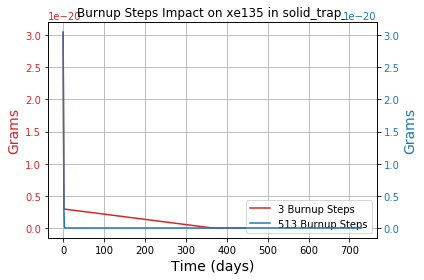

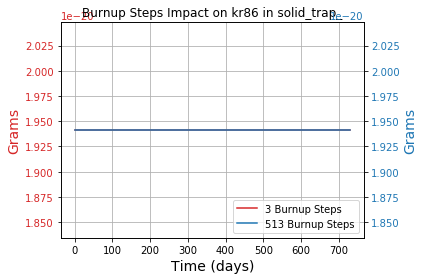

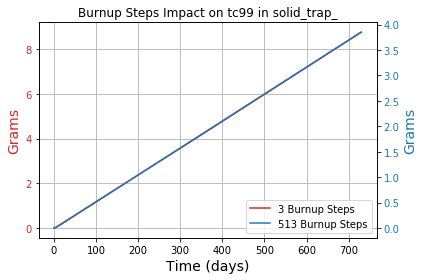

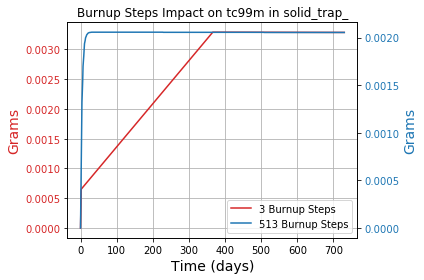

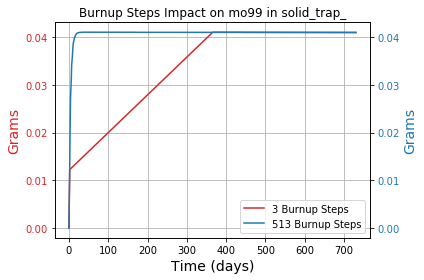

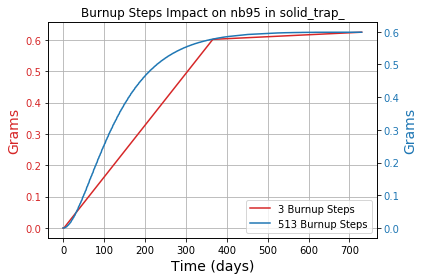

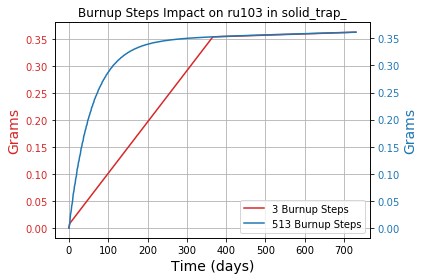

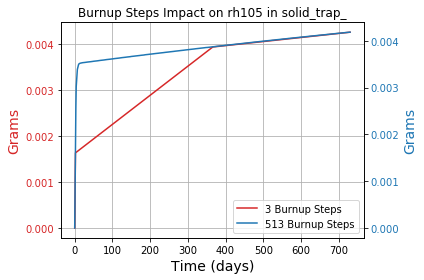

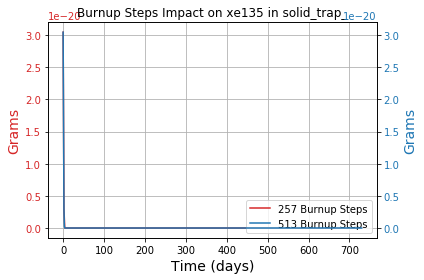

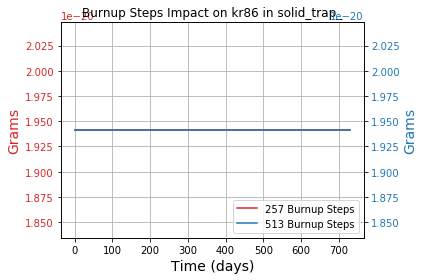

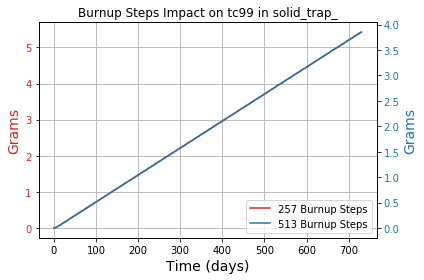

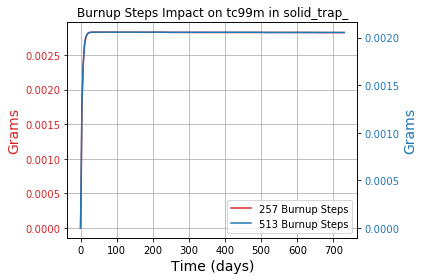

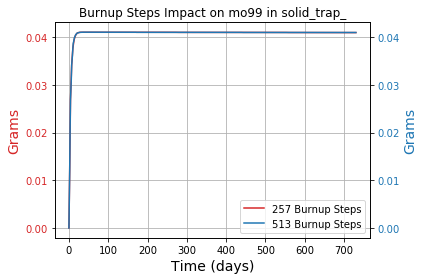

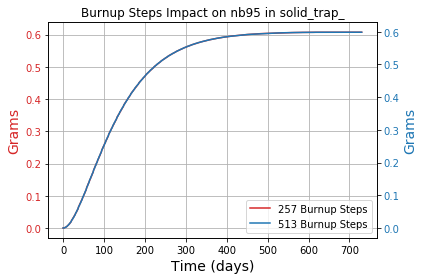

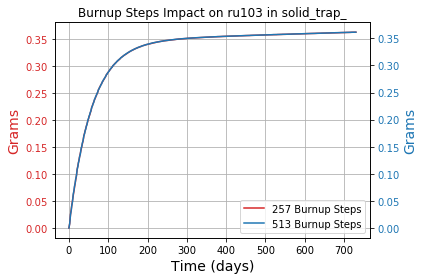

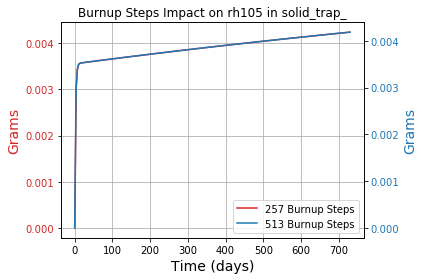

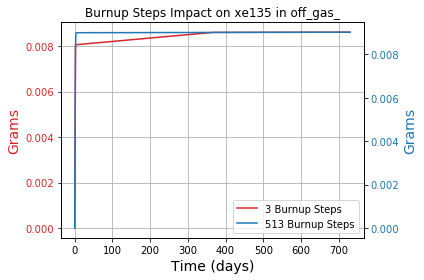

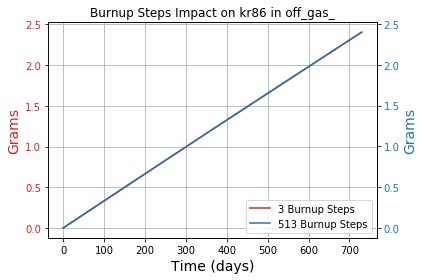

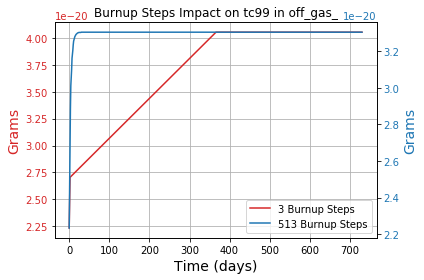

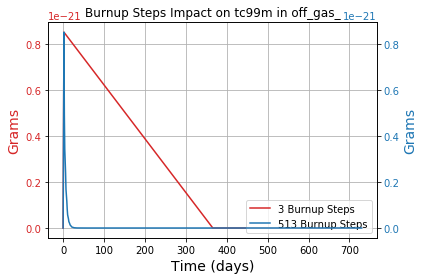

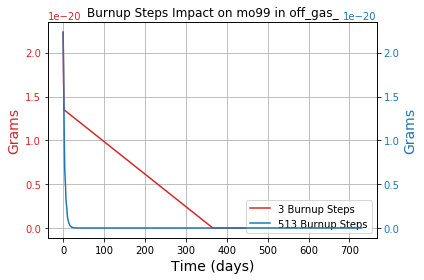

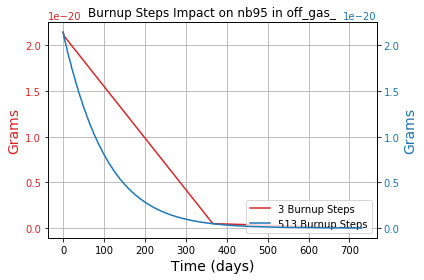

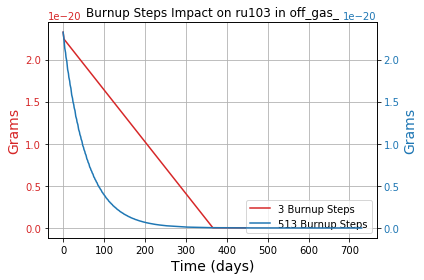

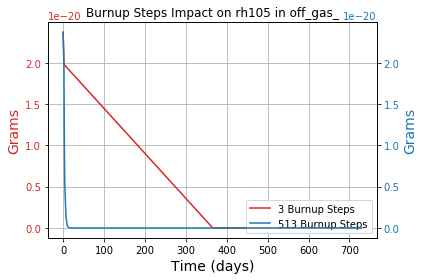

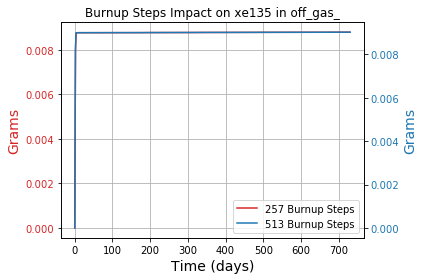

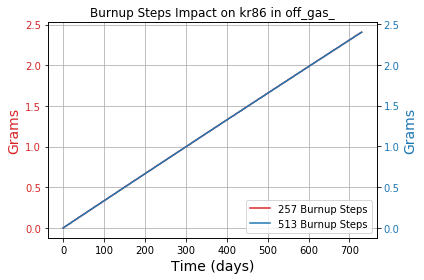

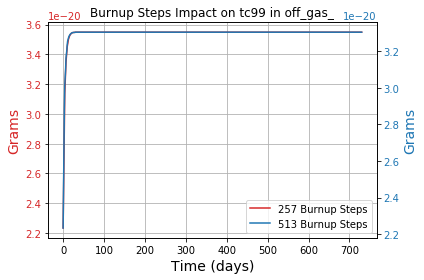

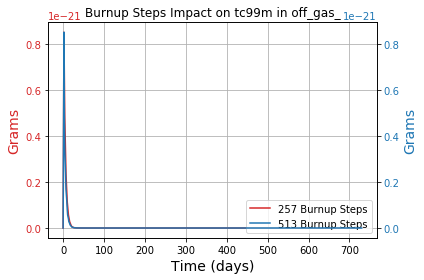

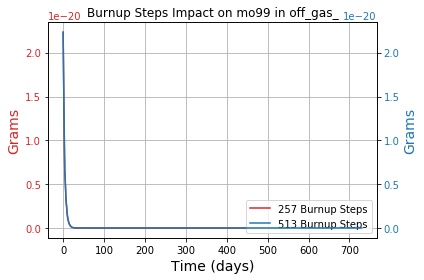

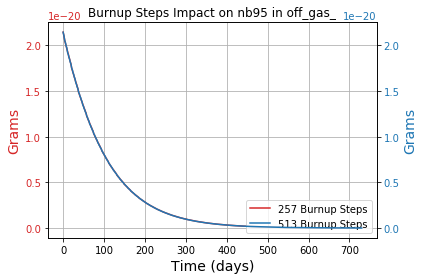

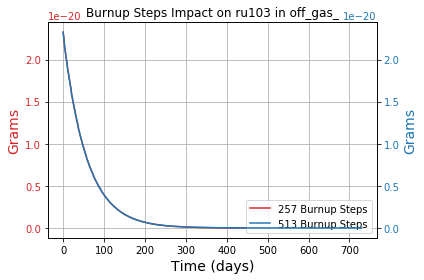

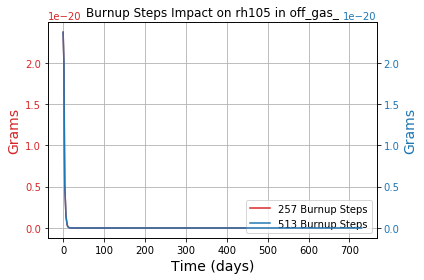

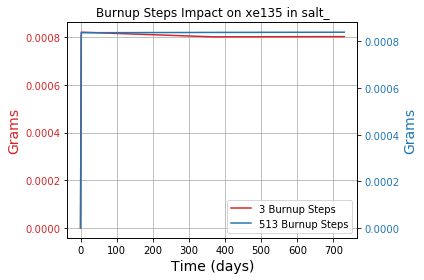

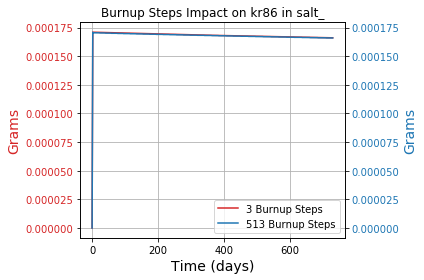

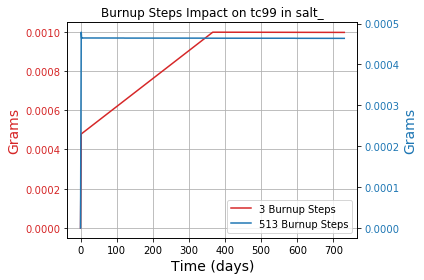

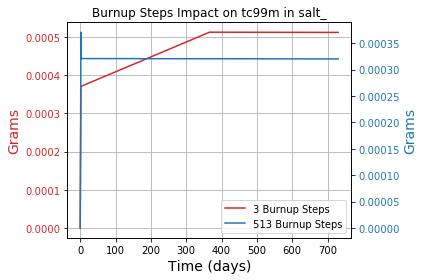

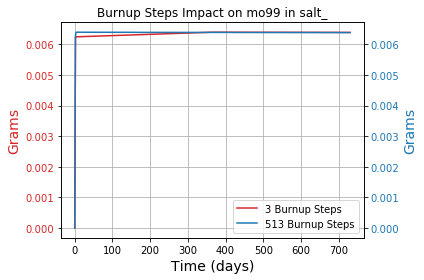

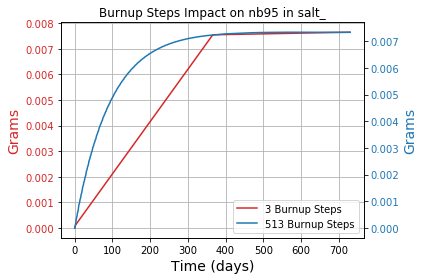

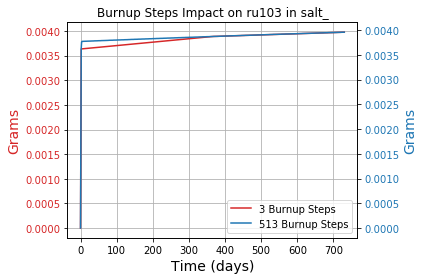

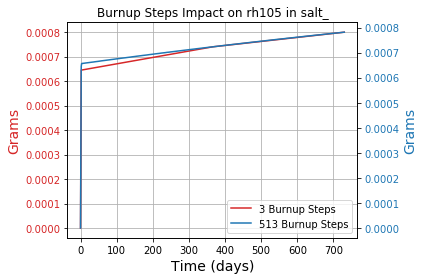

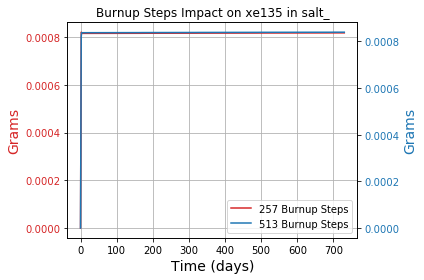

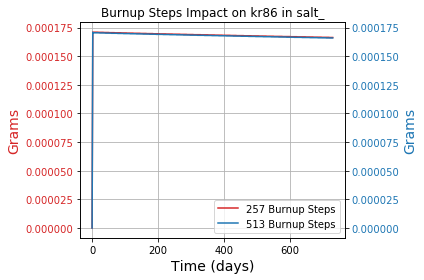

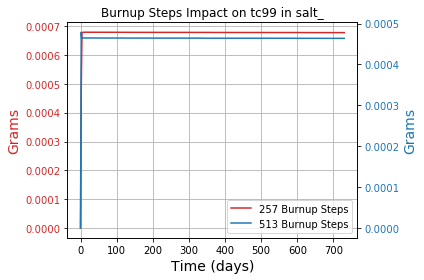

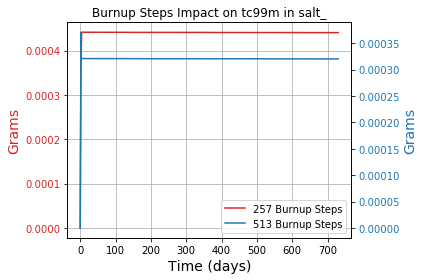

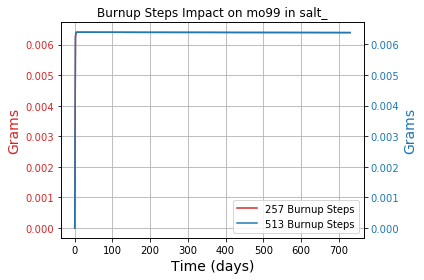

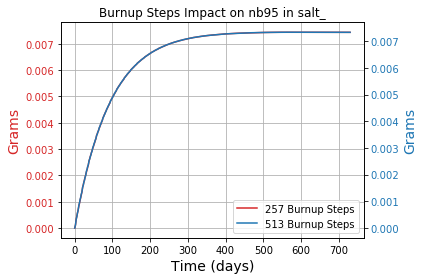

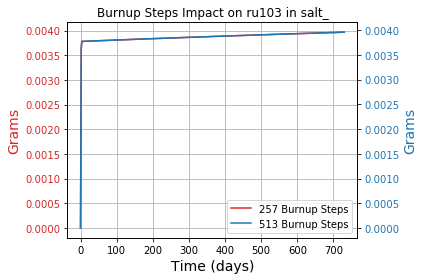

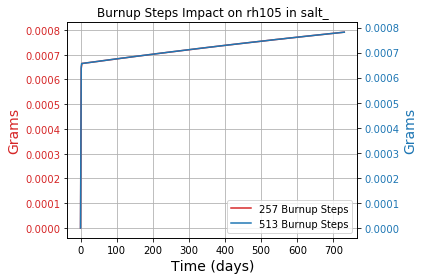

In [11]:
######### Creates directory for each case to store plots ###########
text_path = ("./" + reactor + "/OPUS/High_Low_Comparison/") 
if os.path.exists(text_path):
    shutil.rmtree(text_path)
os.makedirs(text_path)

for x in ["solid_trap", "off_gas", "salt"]:
    df100 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + x + "_comp_" + eff[0] + ".csv"))
    df200 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + x + "_comp_" + eff[-2] + ".csv"))
    df300 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + x + "_comp_" + eff[-1] + ".csv"))
    
    for i in isotopes_interest:
        fig, ax1 = plt.subplots()
        ax1.title.set_text('Impact on {} Concentration in {}'.format(i, x))
        ax1.grid(True)

        color = 'tab:red'
        ax1.set_xlabel('Time (days)', fontsize=14)
        ax1.set_ylabel('Grams', color=color, fontsize=14)
        ax1.plot(df100["time"], df100[i], color=color, label=(eff[0]))
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Grams', color=color, fontsize=14)  # we already handled the x-label with ax1
        ax2.plot(df300["time"], df300[i], color=color, label=(eff[-1]))
        ax2.tick_params(axis='y', labelcolor=color)

        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc="lower right")

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(("./" + reactor + "/OPUS/High_Low_Comparison/" + i + "_" + x + eff[0] + "_" + eff[-1] + "_impact.png"), 
#                         format='png', dpi=500)
        plt.show()
    
    
    for i in isotopes_interest:
        fig, ax1 = plt.subplots()
        ax1.title.set_text('Impact on {} Concentration in {}'.format(i, x))
        ax1.grid(True)

        color = 'tab:red'
        ax1.set_xlabel('Time (days)', fontsize=14)
        ax1.set_ylabel('Grams', color=color, fontsize=14)
        ax1.plot(df200["time"], df200[i], color=color, label=(eff[-2]))
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Grams', color=color, fontsize=14)  # we already handled the x-label with ax1
        ax2.plot(df300["time"], df300[i], color=color, label=(eff[-1]))
        ax2.tick_params(axis='y', labelcolor=color)

        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc="lower right")

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(("./" + reactor + "/OPUS/High_Low_Comparison/" + i + "_" + x + eff[-2] + "_" + eff[-1] + "_impact.png"), 
#                         format='png', dpi=500)
        plt.show()

In [4]:
reactor = "MSRE"

Searching directory for composition csv files...
['./MSRE/OPUS/csv/salt_comp_102.csv', './MSRE/OPUS/csv/salt_comp_104.csv', './MSRE/OPUS/csv/salt_comp_106.csv', './MSRE/OPUS/csv/salt_comp_108.csv', './MSRE/OPUS/csv/salt_comp_110.csv', './MSRE/OPUS/csv/salt_comp_112.csv', './MSRE/OPUS/csv/salt_comp_113.csv', './MSRE/OPUS/csv/salt_comp_115.csv', './MSRE/OPUS/csv/salt_comp_132.csv', './MSRE/OPUS/csv/salt_comp_164.csv', './MSRE/OPUS/csv/salt_comp_227.csv', './MSRE/OPUS/csv/salt_comp_356.csv', './MSRE/OPUS/csv/salt_comp_612.csv']
Searching directory for composition csv files...
['./MSRE/OPUS/csv/off_gas_comp_102.csv', './MSRE/OPUS/csv/off_gas_comp_104.csv', './MSRE/OPUS/csv/off_gas_comp_106.csv', './MSRE/OPUS/csv/off_gas_comp_108.csv', './MSRE/OPUS/csv/off_gas_comp_110.csv', './MSRE/OPUS/csv/off_gas_comp_112.csv', './MSRE/OPUS/csv/off_gas_comp_113.csv', './MSRE/OPUS/csv/off_gas_comp_115.csv', './MSRE/OPUS/csv/off_gas_comp_132.csv', './MSRE/OPUS/csv/off_gas_comp_164.csv', './MSRE/OPUS/csv/of

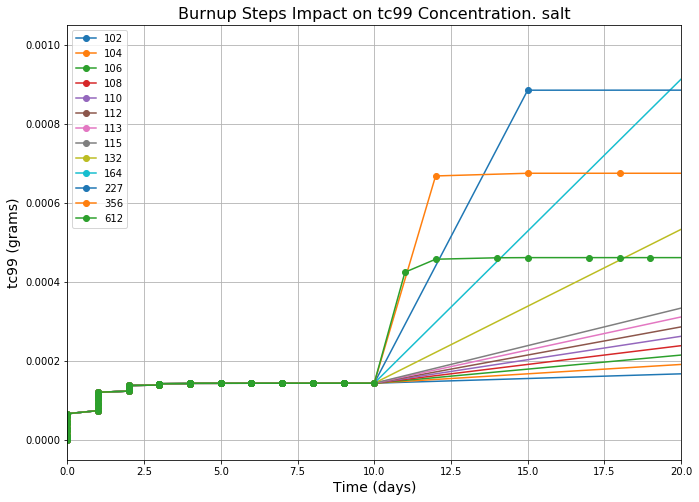

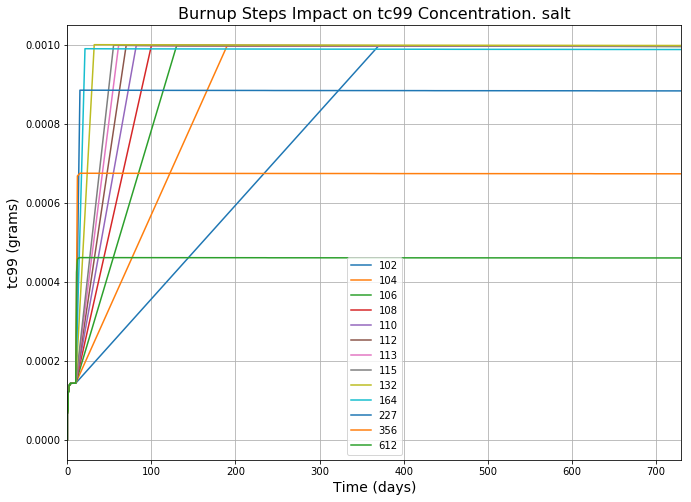

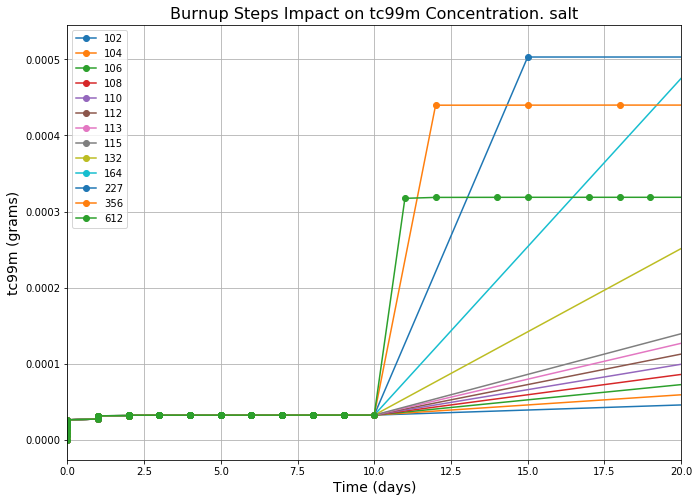

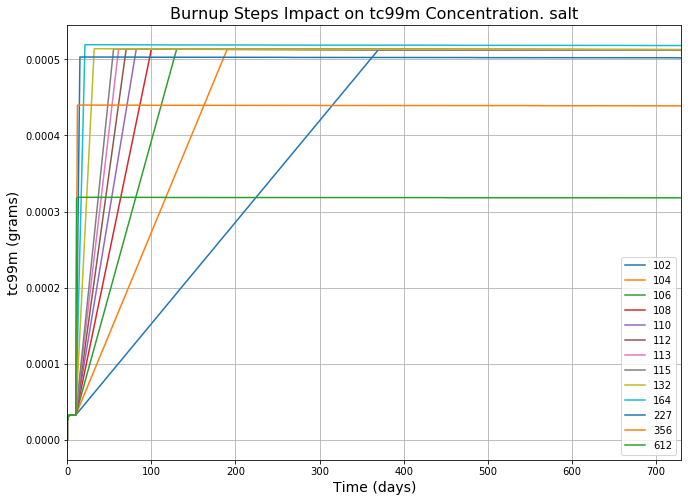

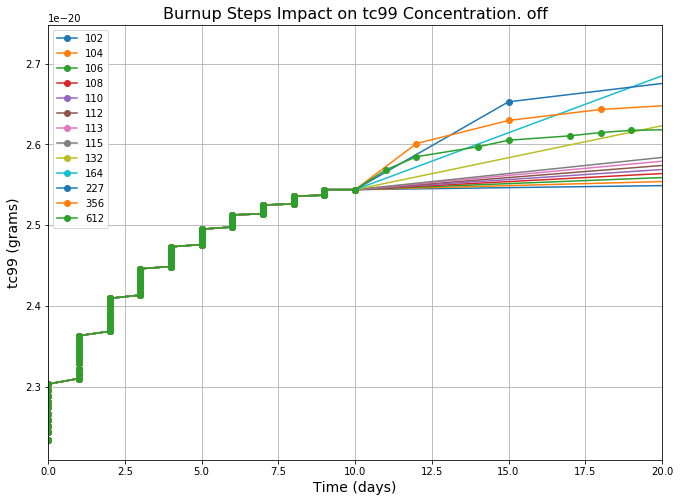

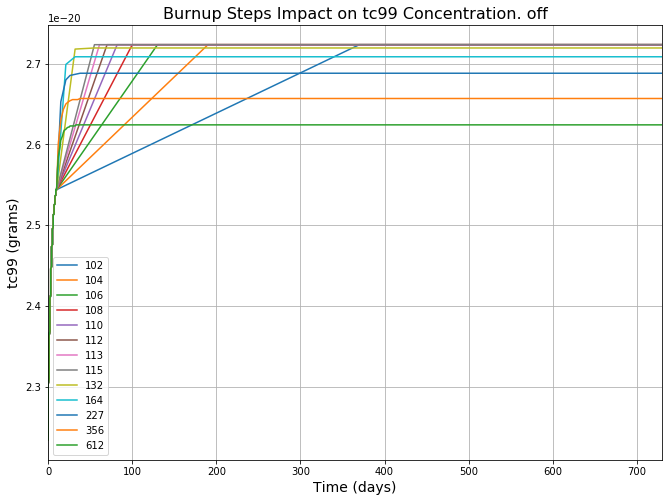

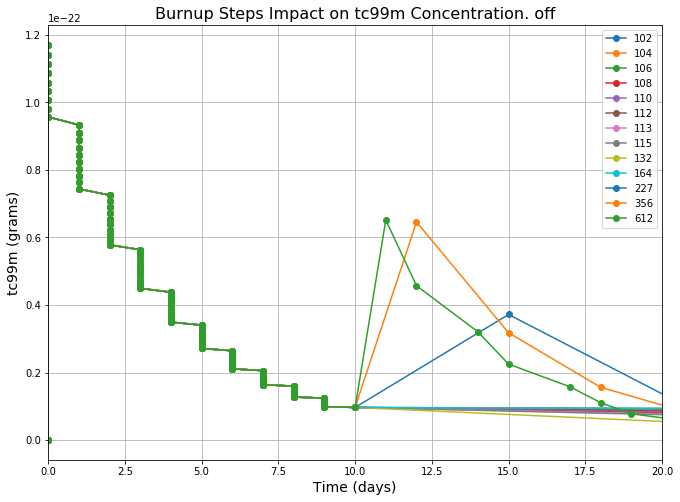

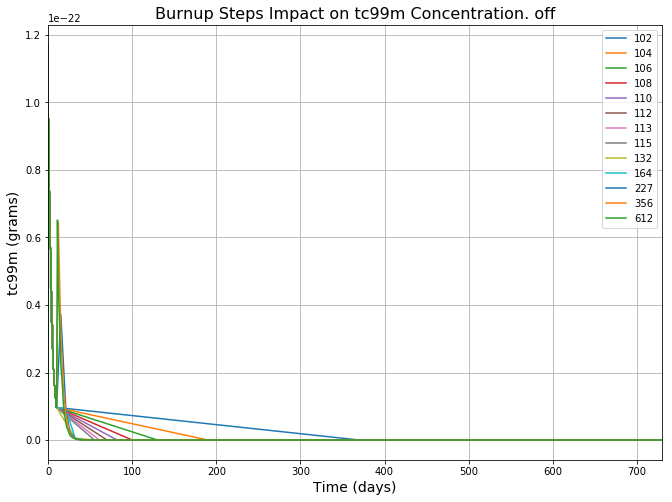

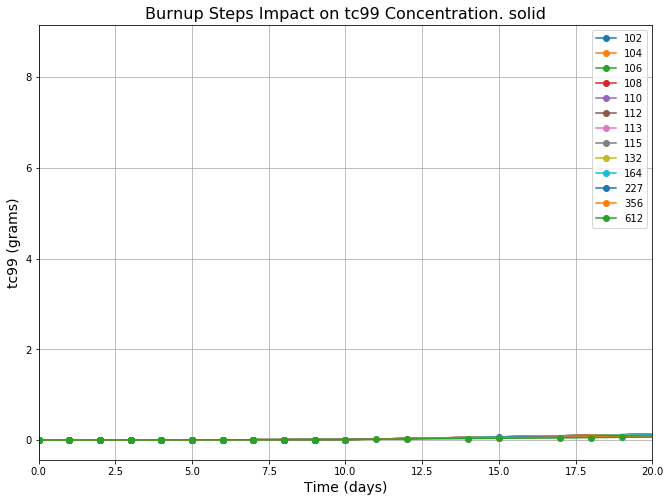

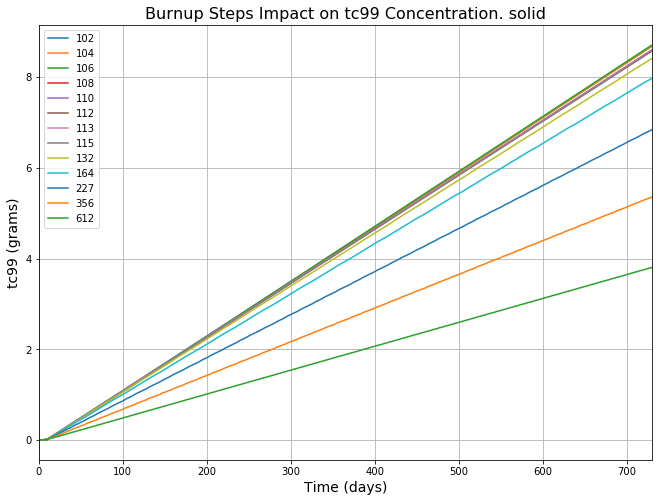

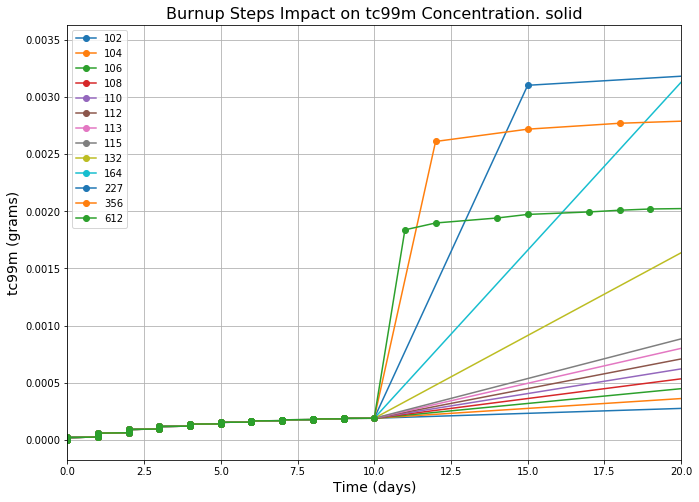

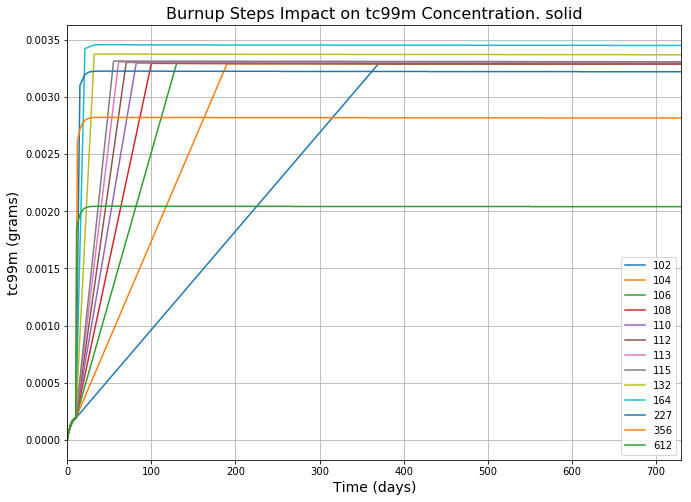

In [9]:
opus_csv_directory = "./" + reactor + "/OPUS/csv/"

for z in ["salt", "off", "solid"]:
    print("Searching directory for composition csv files...")
    csv_names = []
    for root, dirs, files in os.walk(opus_csv_directory):
        for file in files:
            if file.startswith(z):
                csv_names.append(os.path.join(root, file))

    csv_names = natsorted(csv_names)
    print(csv_names)
    
    
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df3 = pd.DataFrame()
    df4 = pd.DataFrame()
    df5 = pd.DataFrame()
    df6 = pd.DataFrame()
    df7 = pd.DataFrame()
    df8 = pd.DataFrame()
    df9 = pd.DataFrame()
    df10 = pd.DataFrame()
    df11 = pd.DataFrame()
    df12 = pd.DataFrame()
    df13 = pd.DataFrame()
    df14 = pd.DataFrame()
    
    for i in range(0, len(csv_names)):
        df = pd.read_csv(csv_names[i])
        if i == 0:
            df1 = df.copy()
        if i == 1:
            df2 = df.copy()
        if i == 2:
            df3 = df.copy()
        if i == 3:
            df4 = df.copy()
        if i == 4:
            df5 = df.copy()
        if i == 5:
            df6 = df.copy()
        if i == 6:
            df7 = df.copy()
        if i == 7:
            df8 = df.copy()
        if i == 8:
            df9 = df.copy()
        if i == 9:
            df10 = df.copy()
        if i == 10:
            df11 = df.copy()
        if i == 11:
            df12 = df.copy()
        if i == 12:
            df13 = df.copy()
        if i == 13:
            df14 = df.copy()

    if z == "solid":
        isotope_list = ["time", "tc99", "tc99m", "mo99", "nb95", "ru103", "rh105"]
    if z == "off":
        isotope_list = ["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]
    if z == "salt":
        isotope_list = ["time", "xe135", "kr86", "u235", "u238", 
                        "u233", "th232", "pu239", "tc99", "tc99m", "mo99", "nb95", "ru103", "rh105"]
        
        
    if parametric == "N":
        non_time_isotope_list = isotope_list[1:]
        for p in non_time_isotope_list:
            ax = df1.plot(x="time", y=p, figsize=(11,8), grid=True)
            df2.plot(x="time", y=p, ax = ax)
            df3.plot(x="time", y=p, ax = ax)
            df4.plot(x="time", y=p, ax = ax)
            df5.plot(x="time", y=p, ax = ax)
            df6.plot(x="time", y=p, ax = ax)
            df7.plot(x="time", y=p, ax = ax)
            df8.plot(x="time", y=p, ax = ax)
            df9.plot(x="time", y=p, ax = ax)
            df10.plot(x="time", y=p, ax = ax)
            # df11.plot(x="time", y=p, ax = ax)
            # df12.plot(x="time", y=p, ax = ax)
            # df13.plot(x="time", y=p, ax = ax)
            # df14.plot(x="time", y=p, ax = ax)
            ax.grid(True)
            ax.set_ylabel(p + " (grams)", fontsize=14)
            ax.set_xlabel("Time (days)", fontsize=14)
            ax.set_title("OGS Efficiency Impact on {} Concentration".format(p), fontsize=16)
            ax.legend(["0%", "5%", "10%", "12%", "15%", "20%", "40%", "60%", "80%", "100%"])
            plt.savefig(("./" + reactor + "/OPUS/" + z + "_" + x + "_eff__impact.png"), 
                            format='png', dpi=500)
        
    if parametric == "Y":
        non_time_isotope_list = ["tc99", "tc99m"]
        for p in non_time_isotope_list:
            ax = df1.plot(x="time", y=p, figsize=(11,8), grid=True, marker='o')
            df2.plot(x="time", y=p, ax = ax, marker='o')
            df3.plot(x="time", y=p, ax = ax, marker='o')
            df4.plot(x="time", y=p, ax = ax, marker='o')
            df5.plot(x="time", y=p, ax = ax, marker='o')
            df6.plot(x="time", y=p, ax = ax, marker='o')
            df7.plot(x="time", y=p, ax = ax, marker='o')
            df8.plot(x="time", y=p, ax = ax, marker='o')
            df9.plot(x="time", y=p, ax = ax, marker='o')
            df10.plot(x="time", y=p, ax = ax, marker='o')
            df11.plot(x="time", y=p, ax = ax, marker='o')
            df12.plot(x="time", y=p, ax = ax, marker='o')
            df13.plot(x="time", y=p, ax = ax, marker='o')
            #df14.plot(x="time", y=p, ax = ax, marker='o')
            ax.grid(True)
            ax.set_ylabel(p + " (grams)", fontsize=14)
            ax.set_xlabel("Time (days)", fontsize=14)
            ax.set_xlim([0, 20])
            ax.set_title("Burnup Steps Impact on {} Concentration. {}".format(p, z), fontsize=16)
            ax.legend(eff)
#             plt.savefig(("./" + reactor + "/OPUS/" + z + "_" + p + "_burnup_effect.png"), 
#                             format='png', dpi=500)    

            ax = df1.plot(x="time", y=p, figsize=(11,8), grid=True)
            df2.plot(x="time", y=p, ax = ax)
            df3.plot(x="time", y=p, ax = ax)
            df4.plot(x="time", y=p, ax = ax)
            df5.plot(x="time", y=p, ax = ax)
            df6.plot(x="time", y=p, ax = ax)
            df7.plot(x="time", y=p, ax = ax)
            df8.plot(x="time", y=p, ax = ax)
            df9.plot(x="time", y=p, ax = ax)
            df10.plot(x="time", y=p, ax = ax)
            df11.plot(x="time", y=p, ax = ax)
            df12.plot(x="time", y=p, ax = ax)
            df13.plot(x="time", y=p, ax = ax)
            #df14.plot(x="time", y=p, ax = ax)
            ax.grid(True)
            ax.set_ylabel(p + " (grams)", fontsize=14)
            ax.set_xlabel("Time (days)", fontsize=14)
            #ax.set_xlim([0, 100])
            ax.set_title("Burnup Steps Impact on {} Concentration. {}".format(p, z), fontsize=16)
            ax.legend(eff)
#             plt.savefig(("./" + reactor + "/OPUS/" + z + "_" + p + "_burnup_effect.png"), 
#                             format='png', dpi=500)    

#         df1 = df1[df1["time"] == 730][isotope_list]
#         df2 = df2[df2["time"] == 730][isotope_list]
#         df3 = df3[df3["time"] == 730][isotope_list]
#         df4 = df4[df4["time"] == 730][isotope_list]
#         df5 = df5[df5["time"] == 730][isotope_list]
#         df6 = df6[df6["time"] == 730][isotope_list]
#         df7 = df7[df7["time"] == 730][isotope_list]
#         df8 = df8[df8["time"] == 730][isotope_list]
#         df9 = df9[df9["time"] == 730][isotope_list]
#         df10 = df10[df10["time"] == 730][isotope_list]
#         df11 = df11[df11["time"] == 730][isotope_list]
#         df12 = df12[df12["time"] == 730][isotope_list]
#         df13 = df13[df13["time"] == 730][isotope_list]
#         #df14 = df14[df14["time"] == 730][isotope_list]

#         #results = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14])
#         results = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13])
#         results['Steps'] = results.index
#         results = results.reset_index(drop=True)
#         results.at[0, 'Steps'] = 1
        
#         isotopes_list = list(results.columns)[1:-1]
#         for i in isotopes_list:
#             string = i + "_error"
#             results[string] = np.abs((results[i] - np.array(results[i])[-1])/np.array(results[i])[-1])
            
#         results.to_csv(reactor + z + ".csv", sep=",")




# OTHER

In [18]:
# fuel_salt_3 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "salt_comp_" + eff[0] + ".csv"))
# fuel_salt_257 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "salt_comp_" + eff[-2] + ".csv"))
# fuel_salt_513 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "salt_comp_" + eff[-1] + ".csv"))

fuel_salt_3 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "solid_trap_comp_" + eff[0] + ".csv"))
fuel_salt_257 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "solid_trap_comp_" + eff[-2] + ".csv"))
fuel_salt_513 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "solid_trap_comp_" + eff[-1] + ".csv"))

In [12]:
# isotopes_interest = ["xe135", "mo99", "tc99m", "tc99"]

# for i in isotopes_interest:
#     fig, ax1 = plt.subplots(figsize=(12,10))
#     ax1.title.set_text('Burnup Steps Impact on ' + i + ' Inventory')
#     ax1.grid(True)

#     color = 'tab:red'
#     ax1.set_xlabel('Time (days)', fontsize=14)
#     ax1.set_ylabel('Grams', color=color, fontsize=14)
#     ax1.plot(fuel_salt_3["time"], fuel_salt_3[i], color=color, label='3 Burnup Steps')
#     ax1.tick_params(axis='y', labelcolor=color)

#     ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#     color = 'tab:blue'
#     ax2.set_ylabel('Grams', color=color, fontsize=14)  # we already handled the x-label with ax1
#     ax2.plot(fuel_salt_513["time"], fuel_salt_513[i], color=color, label='513 Burnup Steps')
#     ax2.tick_params(axis='y', labelcolor=color)

#     h1, l1 = ax1.get_legend_handles_labels()
#     h2, l2 = ax2.get_legend_handles_labels()
#     ax1.legend(h1+h2, l1+l2, loc="lower right")

#     fig.tight_layout()  # otherwise the right y-label is slightly clipped
# #     plt.savefig(("./" + reactor + "/OPUS/" + i + "_513_3_impact.png"), 
# #                     format='png', dpi=500)
#     plt.show()

In [13]:
# isotopes_interest = ["xe135", "mo99", "tc99m", "tc99"]

# for i in isotopes_interest:
#     fig, ax1 = plt.subplots(figsize=(12,10))
#     ax1.title.set_text('Burnup Steps Impact on ' + i + ' Inventory')
#     ax1.grid(True)

#     color = 'tab:red'
#     ax1.set_xlabel('Time (days)', fontsize=14)
#     ax1.set_ylabel('Grams', color=color, fontsize=14)
#     ax1.plot(fuel_salt_257["time"], fuel_salt_257[i], color=color, label='257 Burnup Steps')
#     ax1.tick_params(axis='y', labelcolor=color)

#     ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#     color = 'tab:blue'
#     ax2.set_ylabel('Grams', color=color, fontsize=14)  # we already handled the x-label with ax1
#     ax2.plot(fuel_salt_513["time"], fuel_salt_513[i], color=color, label='513 Burnup Steps')
#     ax2.tick_params(axis='y', labelcolor=color)

#     h1, l1 = ax1.get_legend_handles_labels()
#     h2, l2 = ax2.get_legend_handles_labels()
#     ax1.legend(h1+h2, l1+l2, loc="lower right")

#     fig.tight_layout()  # otherwise the right y-label is slightly clipped
# #     plt.savefig(("./" + reactor + "/OPUS/" + i + "_513_257_impact.png"), 
# #                     format='png', dpi=500)
#     plt.show()

In [2]:
opus_csv_directory = "./" + reactor + "/OPUS/csv/"

#for z in ["0_raw_salt", "0_raw_off", "0_raw_solid"]:
for z in ["salt", "off", "solid"]:
    print("Searching directory for composition csv files...")
    csv_names = []
    for root, dirs, files in os.walk(opus_csv_directory):
        for file in files:
            if file.startswith(z):
                csv_names.append(os.path.join(root, file))

    csv_names = natsorted(csv_names)
    print(csv_names)
    
    df3 = pd.DataFrame()
    df5 = pd.DataFrame()
    df7 = pd.DataFrame()
    df9 = pd.DataFrame()
    df11 = pd.DataFrame()
    df13 = pd.DataFrame()
    df15 = pd.DataFrame()
    df17 = pd.DataFrame()
    df33 = pd.DataFrame()
    df65 = pd.DataFrame()
    df129 = pd.DataFrame()
    df257 = pd.DataFrame()
    df513 = pd.DataFrame()
    
    for i in range(0, len(csv_names)):
        df = pd.read_csv(csv_names[i])
        if i == 0:
            df3 = df.copy()
        if i == 1:
            df5 = df.copy()
        if i == 2:
            df7 = df.copy()
        if i == 3:
            df9 = df.copy()
        if i == 4:
            df11 = df.copy()
        if i == 5:
            df13 = df.copy()
        if i == 6:
            df15 = df.copy()
        if i == 7:
            df17 = df.copy()
        if i == 8:
            df33 = df.copy()
        if i == 9:
            df65 = df.copy()
        if i == 10:
            df129 = df.copy()
        if i == 11:
            df257 = df.copy()
        if i == 12:
            df513 = df.copy()
            
#     df3 = df3[df3["time"] == 730][["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]]
#     df5 = df5[df5["time"] == 730][["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]]
#     df7 = df7[df7["time"] == 730][["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]]
#     df9 = df9[df9["time"] == 730][["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]]
#     df11 = df11[df11["time"] == 730][["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]]
#     df13 = df13[df13["time"] == 730][["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]]
#     df15 = df15[df15["time"] == 730][["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]]
#     df17 = df17[df17["time"] == 730][["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]]
#     df33 = df33[df33["time"] == 730][["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]]
#     df65 = df65[df65["time"] == 730][["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]]

    if z == "solid":
        isotope_list = ["time", "tc99", "tc99m", "mo99", "nb95", "ru103", "rh105"]
    if z == "off":
        isotope_list = ["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239"]
    if z == "salt":
        isotope_list = ["time", "xe135", "kr86", "u235", "u238", "u233", "th232", "pu239", "tc99", "tc99m", "mo99", "nb95", "ru103", "rh105"]

    df3 = df3[df3["time"] == 730][isotope_list]
    df5 = df5[df5["time"] == 730][isotope_list]
    df7 = df7[df7["time"] == 730][isotope_list]
    df9 = df9[df9["time"] == 730][isotope_list]
    df11 = df11[df11["time"] == 730][isotope_list]
    df13 = df13[df13["time"] == 730][isotope_list]
    df15 = df15[df15["time"] == 730][isotope_list]
    df17 = df17[df17["time"] == 730][isotope_list]
    df33 = df33[df33["time"] == 730][isotope_list]
    df65 = df65[df65["time"] == 730][isotope_list]
    df129 = df129[df129["time"] == 730][isotope_list]
    df257 = df257[df257["time"] == 730][isotope_list]
    df513 = df513[df513["time"] == 730][isotope_list]

    results = pd.concat([df3, df5, df7, df9, df11, df13, df15, df17, df33, df65, df129, df257, df513])
    results['Steps'] = results.index
    results = results.reset_index(drop=True)
    results.at[0, 'Steps'] = 1
    results.to_csv(reactor + z + ".csv", sep=",")

Searching directory for composition csv files...
['./MSRE/OPUS/csv/salt_comp_3.csv', './MSRE/OPUS/csv/salt_comp_5.csv', './MSRE/OPUS/csv/salt_comp_7.csv', './MSRE/OPUS/csv/salt_comp_9.csv', './MSRE/OPUS/csv/salt_comp_11.csv', './MSRE/OPUS/csv/salt_comp_13.csv', './MSRE/OPUS/csv/salt_comp_15.csv', './MSRE/OPUS/csv/salt_comp_17.csv', './MSRE/OPUS/csv/salt_comp_33.csv', './MSRE/OPUS/csv/salt_comp_65.csv', './MSRE/OPUS/csv/salt_comp_129.csv', './MSRE/OPUS/csv/salt_comp_257.csv', './MSRE/OPUS/csv/salt_comp_513.csv']
Searching directory for composition csv files...
['./MSRE/OPUS/csv/off_gas_comp_3.csv', './MSRE/OPUS/csv/off_gas_comp_5.csv', './MSRE/OPUS/csv/off_gas_comp_7.csv', './MSRE/OPUS/csv/off_gas_comp_9.csv', './MSRE/OPUS/csv/off_gas_comp_11.csv', './MSRE/OPUS/csv/off_gas_comp_13.csv', './MSRE/OPUS/csv/off_gas_comp_15.csv', './MSRE/OPUS/csv/off_gas_comp_17.csv', './MSRE/OPUS/csv/off_gas_comp_33.csv', './MSRE/OPUS/csv/off_gas_comp_65.csv', './MSRE/OPUS/csv/off_gas_comp_129.csv', './MSRE

https://www.isotopes.gov/outreach/med_isotopes.html